# POKEMON BATTLE WINNER
In this project, I will make prediction of Pokemon winning chance.

## DATA COLLECTING
- pokemon.csv is datasets of all pokemon characters
- combats.csv is datasets of history battle
- tests.csv is datasets for test the model

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb 
import pandas_profiling as pdp

In [20]:
df_pokemon = pd.read_csv("datasets/pokemon.csv")
df_test = pd.read_csv("datasets/tests.csv")
df_battle = pd.read_csv("datasets/combats.csv")

In [21]:
df_pokemon.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [22]:
df_test.head()

,First_pokemon,Second_pokemon
0,129,117
1,660,211
2,706,115
3,195,618
4,27,656


In [5]:
df_battle.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


In [6]:
df_pokemon.describe()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [7]:
df_pokemon.isnull().sum()

#               0
Name            1
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [8]:
#Check where is Pokemon that has NaN value Name
list(np.where(df_pokemon['Name'].isna()))

[array([62], dtype=int64)]

In [9]:
df_pokemon.loc[df_pokemon.Name == 'Mankey']

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
61,62,Mankey,Fighting,NaN,40,80,35,35,45,70,1,False


In [10]:
df_pokemon.iloc[62]

#                   63
Name               NaN
Type 1        Fighting
Type 2             NaN
HP                  65
Attack             105
Defense             60
Sp. Atk             60
Sp. Def             70
Speed               95
Generation           1
Legendary        False
Name: 62, dtype: object

Look at this website https://veekun.com/dex/types/fighting the characteristic is suit to Primweape and before #63 is Mankey #62 that initial form of primeape. So, fill #63 with Primeape.<br>
<img src="images/primeape.png">

In [11]:
#Change index dataframe with id number
df_pokemon = df_pokemon.set_index('#')

In [12]:
df_pokemon['Name'].fillna("Primeape", inplace = True)

In [13]:
#Do not reset the index, cause it will break arrangement matching in another datasets
df_pokemon.iloc[62]

Name          Primeape
Type 1        Fighting
Type 2             NaN
HP                  65
Attack             105
Defense             60
Sp. Atk             60
Sp. Def             70
Speed               95
Generation           1
Legendary        False
Name: 63, dtype: object

In [14]:
#Like we see before, Type 2 have so many missing value. Let's fix them.
df_pokemon.isnull().sum()

Name            0
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [15]:
# Pokemon Characteristic that only have 1 type, will contain NaN value on their Type 2, so just fill them with Type 1, fillna Type 2 method just like below
df = pd.DataFrame(
    np.array([[1, 2, 3], [4, 5, np.nan], [7, 8, 9], [3, 2, np.nan], [5, 6, np.nan]]), 
    columns=['a', 'b', 'c']
)
df['c'] = df.apply(
    lambda row: row['b'] if np.isnan(row['c']) else row['c'],
    axis=1
)

In [16]:
df

,a,b,c
0,1.0,2.0,3.0
1,4.0,5.0,5.0
2,7.0,8.0,9.0
3,3.0,2.0,2.0
4,5.0,6.0,6.0


In [17]:
df_pokemon['Type 2'] = df_pokemon.apply(
    lambda row: row['Type 1'] if pd.isnull(row['Type 2']) else row['Type 2'], axis=1
)

In [18]:
df_pokemon

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
5,Charmander,Fire,Fire,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...
796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True


In [19]:
#Check again is there any missing value, there's no any missing value again
df_pokemon.isnull().sum()

Name          0
Type 1        0
Type 2        0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

## EDA

### Now, let's convert the winner of battle to ordinal data


In [20]:
df_battle['1st_Win'] = df_battle.apply(lambda col: 1 if col['Winner'] == col['First_pokemon'] else 0, axis=1)
df_battle['2nd_Win'] = df_battle.apply(lambda col: 1 if col['Winner'] == col['Second_pokemon'] else 0, axis=1)

In [21]:
df_battle

,First_pokemon,Second_pokemon,Winner,1st_Win,2nd_Win
0,266,298,298,0,1
1,702,701,701,0,1
2,191,668,668,0,1
3,237,683,683,0,1
4,151,231,151,1,0
...,...,...,...,...,...
49995,707,126,707,1,0
49996,589,664,589,1,0
49997,303,368,368,0,1
49998,109,89,109,1,0


In [22]:
df_battle['Name_1st'] =  df_battle['First_pokemon'].apply(lambda x: df_pokemon['Name'][x])
df_battle['Type1_1st'] =  df_battle['First_pokemon'].apply(lambda x: df_pokemon['Type 1'][x])
df_battle['Type2_1st'] =  df_battle['First_pokemon'].apply(lambda x: df_pokemon['Type 2'][x])
df_battle['HP_1st'] =  df_battle['First_pokemon'].apply(lambda x: df_pokemon['HP'][x])
df_battle['Atk_1st'] =  df_battle['First_pokemon'].apply(lambda x: df_pokemon['Attack'][x])
df_battle['Def_1st'] =  df_battle['First_pokemon'].apply(lambda x: df_pokemon['Defense'][x])
df_battle['SpAtk_1st'] =  df_battle['First_pokemon'].apply(lambda x: df_pokemon['Sp. Atk'][x])
df_battle['SpDef_1st'] =  df_battle['First_pokemon'].apply(lambda x: df_pokemon['Sp. Def'][x])
df_battle['Speed_1st'] =  df_battle['First_pokemon'].apply(lambda x: df_pokemon['Speed'][x])

df_battle['Name_2nd'] =  df_battle['Second_pokemon'].apply(lambda x: df_pokemon['Name'][x])
df_battle['Type1_2nd'] =  df_battle['Second_pokemon'].apply(lambda x: df_pokemon['Type 1'][x])
df_battle['Type2_2nd'] =  df_battle['Second_pokemon'].apply(lambda x: df_pokemon['Type 2'][x])
df_battle['HP_2nd'] =  df_battle['Second_pokemon'].apply(lambda x: df_pokemon['HP'][x])
df_battle['Atk_2nd'] =  df_battle['Second_pokemon'].apply(lambda x: df_pokemon['Attack'][x])
df_battle['Def_2nd'] =  df_battle['Second_pokemon'].apply(lambda x: df_pokemon['Defense'][x])
df_battle['SpAtk_2nd'] =  df_battle['Second_pokemon'].apply(lambda x: df_pokemon['Sp. Atk'][x])
df_battle['SpDef_2nd'] =  df_battle['Second_pokemon'].apply(lambda x: df_pokemon['Sp. Def'][x])
df_battle['Speed_2nd'] =  df_battle['Second_pokemon'].apply(lambda x: df_pokemon['Speed'][x])

df_battle['Win'] =  df_battle['Winner'].apply(lambda x: df_pokemon['Name'][x])

In [23]:
df_battle

,First_pokemon,Second_pokemon,Winner,1st_Win,2nd_Win,Name_1st,Type1_1st,Type2_1st,HP_1st,Atk_1st,...,Name_2nd,Type1_2nd,Type2_2nd,HP_2nd,Atk_2nd,Def_2nd,SpAtk_2nd,SpDef_2nd,Speed_2nd,Win
0,266,298,298,0,1,Larvitar,Rock,Ground,50,64,...,Nuzleaf,Grass,Dark,70,70,40,60,40,60,Nuzleaf
1,702,701,701,0,1,Virizion,Grass,Fighting,91,90,...,Terrakion,Rock,Fighting,91,129,90,72,90,108,Terrakion
2,191,668,668,0,1,Togetic,Fairy,Flying,55,40,...,Beheeyem,Psychic,Psychic,75,75,75,125,95,40,Beheeyem
3,237,683,683,0,1,Slugma,Fire,Fire,40,40,...,Druddigon,Dragon,Dragon,77,120,90,60,90,48,Druddigon
4,151,231,151,1,0,Omastar,Rock,Water,70,60,...,Shuckle,Bug,Rock,20,10,230,10,230,5,Omastar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,707,126,707,1,0,Reshiram,Dragon,Fire,100,120,...,Horsea,Water,Water,30,40,70,70,25,60,Reshiram
49996,589,664,589,1,0,Drilbur,Ground,Ground,60,85,...,Tynamo,Electric,Electric,35,55,40,45,40,60,Drilbur
49997,303,368,368,0,1,Pelipper,Water,Flying,60,50,...,Zangoose,Normal,Normal,73,115,60,60,60,90,Zangoose
49998,109,89,109,1,0,Voltorb,Electric,Electric,40,30,...,Magnemite,Electric,Steel,25,35,70,95,55,45,Voltorb


## Labeling Encoder

In [25]:
from sklearn.preprocessing import LabelEncoder

In [27]:
le = LabelEncoder()

In [28]:
le_type1_1st = le.fit_transform(df_battle['Type1_1st'])
le_type2_1st = le.fit_transform(df_battle['Type2_1st'])
le_type1_2nd = le.fit_transform(df_battle['Type1_2nd'])
le_type2_2nd = le.fit_transform(df_battle['Type2_2nd'])

In [30]:
df_battle['le_type1_1st'] = le_type1_1st
df_battle['le_type2_1st'] = le_type2_1st
df_battle['le_type1_2nd'] = le_type1_2nd
df_battle['le_type2_2nd'] = le_type2_2nd

In [31]:
df_battle

,First_pokemon,Second_pokemon,Winner,1st_Win,2nd_Win,Name_1st,Type1_1st,Type2_1st,HP_1st,Atk_1st,...,Atk_2nd,Def_2nd,SpAtk_2nd,SpDef_2nd,Speed_2nd,Win,le_type1_1st,le_type2_1st,le_type1_2nd,le_type2_2nd
0,266,298,298,0,1,Larvitar,Rock,Ground,50,64,...,70,40,60,40,60,Nuzleaf,15,10,9,1
1,702,701,701,0,1,Virizion,Grass,Fighting,91,90,...,129,90,72,90,108,Terrakion,9,5,15,5
2,191,668,668,0,1,Togetic,Fairy,Flying,55,40,...,75,75,125,95,40,Beheeyem,4,7,14,14
3,237,683,683,0,1,Slugma,Fire,Fire,40,40,...,120,90,60,90,48,Druddigon,6,6,2,2
4,151,231,151,1,0,Omastar,Rock,Water,70,60,...,10,230,10,230,5,Omastar,15,17,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,707,126,707,1,0,Reshiram,Dragon,Fire,100,120,...,40,70,70,25,60,Reshiram,2,6,17,17
49996,589,664,589,1,0,Drilbur,Ground,Ground,60,85,...,55,40,45,40,60,Drilbur,10,10,3,3
49997,303,368,368,0,1,Pelipper,Water,Flying,60,50,...,115,60,60,60,90,Zangoose,17,7,12,12
49998,109,89,109,1,0,Voltorb,Electric,Electric,40,30,...,35,70,95,55,45,Voltorb,3,3,3,16


In [32]:
profile_raw_2 = df_battle.profile_report(title = 'Pandas Profiling Report')
profile_raw_2.to_file(output_file="data_profiling_2.html")

build report structure: 100%|██████████| 1/1 [00:11<00:00, 11.11s/it]


This shown that second pokemon have bigger percentage (more count) as the winner.<br><br>
<img src="images/who_win.png">

In [67]:
profile_raw = df_battle.profile_report(title = 'Pandas Profiling Report')
profile_raw.to_file(output_file="data_profiling.html")

build report structure: 100%|██████████| 1/1 [00:10<00:00, 10.47s/it]


### from pandas profiling we got so many information, the highest winner, the most type, and the most pokemon that battle others.


- 1st Pokemon ID Number Frequency<br><br>
<img src="images/1st_poke.png">

- 1st Pokemon Name & Type Frequency<br><br>
<img src="images/1st_poke_name_type.png">

- 2nd Pokemon ID Number<br><br>
<img src="images/2nd_poke.png">

- 2nd Pokemon Name & Type Frequency<br><br>
<img src="images/2nd_poke_name_type.png">

Correlation winner with features.<br>
We can see that there is no significant correlation, except for First_pokemon and second_pokemon features, it appears that Second_pokemon has a higher positive correlation.<br>
When viewed from the victory of the first pokemon or the second pokemon, the correlation to speed is the highest compared to other ability attributes, even defeating the HP correlation.<br><br>
<img src="images/pearson_corr.png">

### So, the features that we will use are HP, Attack, Defend, & Sp. Attack, Sp. Defend

### We will do the same modification as combat.csv for the test.csv file

In [34]:
df_test['Name_1st'] =  df_test['First_pokemon'].apply(lambda x: df_pokemon['Name'][x])
df_test['Type1_1st'] =  df_test['First_pokemon'].apply(lambda x: df_pokemon['Type 1'][x])
df_test['Type2_1st'] =  df_test['First_pokemon'].apply(lambda x: df_pokemon['Type 2'][x])
df_test['HP_1st'] =  df_test['First_pokemon'].apply(lambda x: df_pokemon['HP'][x])
df_test['Atk_1st'] =  df_test['First_pokemon'].apply(lambda x: df_pokemon['Attack'][x])
df_test['Def_1st'] =  df_test['First_pokemon'].apply(lambda x: df_pokemon['Defense'][x])
df_test['SpAtk_1st'] =  df_test['First_pokemon'].apply(lambda x: df_pokemon['Sp. Atk'][x])
df_test['SpDef_1st'] =  df_test['First_pokemon'].apply(lambda x: df_pokemon['Sp. Def'][x])
df_test['Speed_1st'] =  df_test['First_pokemon'].apply(lambda x: df_pokemon['Speed'][x])

df_test['Name_2nd'] =  df_test['Second_pokemon'].apply(lambda x: df_pokemon['Name'][x])
df_test['Type1_2nd'] =  df_test['Second_pokemon'].apply(lambda x: df_pokemon['Type 1'][x])
df_test['Type2_2nd'] =  df_test['Second_pokemon'].apply(lambda x: df_pokemon['Type 2'][x])
df_test['HP_2nd'] =  df_test['Second_pokemon'].apply(lambda x: df_pokemon['HP'][x])
df_test['Atk_2nd'] =  df_test['Second_pokemon'].apply(lambda x: df_pokemon['Attack'][x])
df_test['Def_2nd'] =  df_test['Second_pokemon'].apply(lambda x: df_pokemon['Defense'][x])
df_test['SpAtk_2nd'] =  df_test['Second_pokemon'].apply(lambda x: df_pokemon['Sp. Atk'][x])
df_test['SpDef_2nd'] =  df_test['Second_pokemon'].apply(lambda x: df_pokemon['Sp. Def'][x])
df_test['Speed_2nd'] =  df_test['Second_pokemon'].apply(lambda x: df_pokemon['Speed'][x])

In [35]:
df_test

,First_pokemon,Second_pokemon,Name_1st,Type1_1st,Type2_1st,HP_1st,Atk_1st,Def_1st,SpAtk_1st,SpDef_1st,Speed_1st,Name_2nd,Type1_2nd,Type2_2nd,HP_2nd,Atk_2nd,Def_2nd,SpAtk_2nd,SpDef_2nd,Speed_2nd
0,129,117,Seaking,Water,Water,80,92,65,65,80,68,Lickitung,Normal,Normal,90,55,75,60,75,30
1,660,211,Ferrothorn,Grass,Steel,74,94,131,54,116,20,Quagsire,Water,Ground,95,85,85,65,65,35
2,706,115,Thundurus Therian Forme,Electric,Flying,79,105,70,145,80,101,Hitmonlee,Fighting,Fighting,50,120,53,35,110,87
3,195,618,Flaaffy,Electric,Electric,70,55,55,80,60,45,Maractus,Grass,Grass,75,86,67,106,67,60
4,27,656,Spearow,Normal,Flying,40,60,30,31,31,70,Alomomola,Water,Water,165,75,80,40,45,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,216,498,Misdreavus,Ghost,Ghost,60,60,60,85,85,85,Lucario,Fighting,Steel,70,110,70,115,70,90
9996,113,404,Cubone,Ground,Ground,50,50,95,40,50,35,Gorebyss,Water,Water,55,84,105,114,75,52
9997,493,104,Gabite,Dragon,Ground,68,90,65,50,55,82,Onix,Rock,Ground,35,45,160,30,45,70
9998,643,259,Swanna,Water,Flying,75,87,63,87,63,98,Elekid,Electric,Electric,45,63,37,65,55,95


### We will create two new datasets from battle train and test datasets that have been modified.

In [36]:
df_battle = df_battle.drop(['le_type1_1st','le_type1_2nd','le_type2_1st','le_type2_2nd'],axis=1)

In [37]:
df_battle.to_csv('battle.csv', index=False)
df_test.to_csv('test2.csv', index=False)

## Build the Classifiers

### In this case, the research will be carried out using the Decision Tree Classifier algorithm. <br><br>
<img src="images/DC_Animal.png">

In [13]:
from sklearn.tree import DecisionTreeClassifier as dtc

## Train the Classifiers

### As seen above, the comparison between the target winners containing the first pokemon or the second pokemon is still classified as balanced data.

In [3]:
df_train = pd.read_csv("battle.csv")
df_train

,First_pokemon,Second_pokemon,Winner,1st_Win,2nd_Win,Name_1st,Type1_1st,Type2_1st,HP_1st,Atk_1st,...,Name_2nd,Type1_2nd,Type2_2nd,HP_2nd,Atk_2nd,Def_2nd,SpAtk_2nd,SpDef_2nd,Speed_2nd,Win
0,266,298,298,0,1,Larvitar,Rock,Ground,50,64,...,Nuzleaf,Grass,Dark,70,70,40,60,40,60,Nuzleaf
1,702,701,701,0,1,Virizion,Grass,Fighting,91,90,...,Terrakion,Rock,Fighting,91,129,90,72,90,108,Terrakion
2,191,668,668,0,1,Togetic,Fairy,Flying,55,40,...,Beheeyem,Psychic,Psychic,75,75,75,125,95,40,Beheeyem
3,237,683,683,0,1,Slugma,Fire,Fire,40,40,...,Druddigon,Dragon,Dragon,77,120,90,60,90,48,Druddigon
4,151,231,151,1,0,Omastar,Rock,Water,70,60,...,Shuckle,Bug,Rock,20,10,230,10,230,5,Omastar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,707,126,707,1,0,Reshiram,Dragon,Fire,100,120,...,Horsea,Water,Water,30,40,70,70,25,60,Reshiram
49996,589,664,589,1,0,Drilbur,Ground,Ground,60,85,...,Tynamo,Electric,Electric,35,55,40,45,40,60,Drilbur
49997,303,368,368,0,1,Pelipper,Water,Flying,60,50,...,Zangoose,Normal,Normal,73,115,60,60,60,90,Zangoose
49998,109,89,109,1,0,Voltorb,Electric,Electric,40,30,...,Magnemite,Electric,Steel,25,35,70,95,55,45,Voltorb


In [4]:
x = df_train.drop(['First_pokemon','Second_pokemon','Winner','1st_Win','2nd_Win','Name_1st','Name_2nd','Type1_1st','Type2_1st','Type1_2nd','Type2_2nd','Win'],axis=1)
y = df_train[['2nd_Win']]

In [5]:
x

,HP_1st,Atk_1st,Def_1st,SpAtk_1st,SpDef_1st,Speed_1st,HP_2nd,Atk_2nd,Def_2nd,SpAtk_2nd,SpDef_2nd,Speed_2nd
0,50,64,50,45,50,41,70,70,40,60,40,60
1,91,90,72,90,129,108,91,129,90,72,90,108
2,55,40,85,80,105,40,75,75,75,125,95,40
3,40,40,40,70,40,20,77,120,90,60,90,48
4,70,60,125,115,70,55,20,10,230,10,230,5
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,100,120,100,150,120,90,30,40,70,70,25,60
49996,60,85,40,30,45,68,35,55,40,45,40,60
49997,60,50,100,85,70,65,73,115,60,60,60,90
49998,40,30,50,55,55,100,25,35,70,95,55,45


In [6]:
y

,2nd_Win
0,1
1,1
2,1
3,1
4,0
...,...
49995,0
49996,0
49997,1
49998,0


### Splitting

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
xtr, xts, ytr, yts = train_test_split(x, y, test_size=0.2, random_state=21)

In [9]:
print(xtr.shape)
print(ytr.shape)
print(xts.shape)
print(yts.shape)

(40000, 12)
(40000, 1)
(10000, 12)
(10000, 1)


In [11]:
xts

,HP_1st,Atk_1st,Def_1st,SpAtk_1st,SpDef_1st,Speed_1st,HP_2nd,Atk_2nd,Def_2nd,SpAtk_2nd,SpDef_2nd,Speed_2nd
26733,59,59,58,90,70,73,54,45,47,75,98,52
33996,79,115,70,125,80,111,41,56,40,62,44,71
20423,70,110,75,145,85,145,90,75,85,115,90,55
17716,90,110,80,100,80,95,80,135,85,70,95,150
49103,50,100,150,100,150,50,55,55,45,63,45,45
...,...,...,...,...,...,...,...,...,...,...,...,...
2639,70,140,230,60,80,50,36,50,50,65,60,44
6656,1,90,45,30,30,40,60,100,89,55,69,112
16176,55,112,45,74,45,70,55,104,105,94,75,52
10147,54,78,103,53,45,22,57,80,91,80,87,75


In [14]:
dtcDef = dtc().fit(xtr,ytr)
dtcDef

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [15]:
dtcScore_train = dtcDef.score(xtr,ytr)
dtcScore_test = dtcDef.score(xts,yts)
print(dtcScore_train)
print(dtcScore_test)

0.9999
0.9194


We see something weird here, so we chheck it. Is there any pokemon with HP value is one?

In [16]:
xts.iloc[[9996]]

,HP_1st,Atk_1st,Def_1st,SpAtk_1st,SpDef_1st,Speed_1st,HP_2nd,Atk_2nd,Def_2nd,SpAtk_2nd,SpDef_2nd,Speed_2nd
6656,1,90,45,30,30,40,60,100,89,55,69,112


In [23]:
df_pokemon.loc[df_pokemon['Name']=='Shedinja']

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
316,317,Shedinja,Bug,Ghost,1,90,45,30,30,40,3,False


In [24]:
df_train.loc[df_train['HP_1st']==1].head()

,First_pokemon,Second_pokemon,Winner,1st_Win,2nd_Win,Name_1st,Type1_1st,Type2_1st,HP_1st,Atk_1st,...,Name_2nd,Type1_2nd,Type2_2nd,HP_2nd,Atk_2nd,Def_2nd,SpAtk_2nd,SpDef_2nd,Speed_2nd,Win
413,317,294,317,1,0,Shedinja,Bug,Ghost,1,90,...,Lotad,Water,Grass,40,30,30,40,50,30,Shedinja
1136,317,102,102,0,1,Shedinja,Bug,Ghost,1,90,...,Gengar,Ghost,Poison,60,65,60,130,75,110,Gengar
3339,317,367,367,0,1,Shedinja,Bug,Ghost,1,90,...,Mega Altaria,Dragon,Fairy,75,110,110,110,105,80,Mega Altaria
3369,317,56,56,0,1,Shedinja,Bug,Ghost,1,90,...,Diglett,Ground,Ground,10,55,25,35,45,95,Diglett
4731,317,437,317,1,0,Shedinja,Bug,Ghost,1,90,...,Monferno,Fire,Fighting,64,78,52,78,52,81,Shedinja


Check probability

In [25]:
ypDTC_500 = dtcDef.predict(xts.iloc[[500]])[0]
ypDTC_500

1

In [26]:
yts.iloc[500]

2nd_Win    0
Name: 42149, dtype: int64

In [27]:
probaDTC_500 = dtcDef.predict_proba(xts.iloc[[500]])[0]*100
probaDTC_500

array([  0., 100.])

## Evaluation Metrics

A decision tree computes the class probability from the number of samples of each class that fall into a given leaf.

The default values for the parameters controlling the size of the trees (e.g. max_depth, min_sample_leaf,etc) lead to fully grown & unpruned trees.

The tree is grown until it perfectly overfits the training data.This means that all training samples in each leaf are of the same class & a test sample either matches that class  (p=1) or does not (p=0)

### Take another algorithm that can measure probability 

## Gradien Boost Classifier

This picture shown that the differences between bagging & boosting algorithm.<br><br>
<img src="images/bagging-boosting.png">

In [30]:
from sklearn.ensemble import GradientBoostingClassifier as gbc

In [31]:
gbcdef = gbc().fit(xtr, ytr)
gbcdef

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [32]:
gbcScore_train = gbcdef.score(xtr,ytr)
gbcScore_test = gbcdef.score(xts,yts)
print(gbcScore_train)
print(gbcScore_test)

0.926175
0.9199


In [33]:
ypGBC_500 = gbcdef.predict(xts.iloc[[500]])[0]
ypGBC_500

0

In [34]:
yts.iloc[500]

2nd_Win    0
Name: 42149, dtype: int64

In [35]:
probaGBC_500 = gbcdef.predict_proba(xts.iloc[[500]])[0]*100
probaGBC_500

array([85.53099954, 14.46900046])

In [36]:
ypGBC_9996 = gbcdef.predict(xts.iloc[[9996]])[0]
ypGBC_9996

1

In [37]:
yts.iloc[9996]

2nd_Win    1
Name: 6656, dtype: int64

In [38]:
probaGBC_9996 = gbcdef.predict_proba(xts.iloc[[9996]])[0]*100
probaGBC_9996

array([ 3.16957768, 96.83042232])

## Evaluation Metrics

### Insert Pokemon 1 and Pokemon 2 for predict

In [121]:
pokemon1 = 'mega diancie'
pokemon2 = 'Mewtwo'

In [126]:
new = []
for sp in pokemon1:
    if sp.isspace():
        print('True')
        splitting = pokemon1.split(' ')
        print(splitting)
        for x in splitting:
            y = x.capitalize()
            new.append(y)
            if len(new) == 2:
                pokemon1 = new[0] + ' ' + new[1]
            elif len(new) == 3:
                pokemon1 = new[0] + ' ' + new[1] + ' ' + new[2]
        dataA = df_pokemon[df_pokemon['Name'] == pokemon1][['HP','Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].values.tolist()
        break
    else:
       dataA = df_pokemon[df_pokemon['Name'] == pokemon1.capitalize()][['HP','Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].values.tolist()
print(pokemon1)
print(dataA)

True
['mega', 'diancie']
Mega Diancie
[]


In [93]:
new = []
for sp in pokemon2:
    if sp.isspace():
        print('True')
        splitting = pokemon2.split(' ')
        print(splitting)
        for x in splitting:
            y = x.capitalize()
            new.append(y)
            if len(new) == 2:
                pokemon2 = new[0] + ' ' + new[1]
            elif len(new) == 3:
                pokemon2 = new[0] + ' ' + new[1] + ' ' + new[2]
        dataB = df_pokemon[df_pokemon['Name'] == pokemon2][['HP','Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].values.tolist()
        break
    else:
        dataB = df_pokemon[df_pokemon['Name'] == pokemon2.capitalize()][['HP','Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].values.tolist()
print(pokemon2)
print(dataB)

Mewtwo
[[106, 110, 90, 154, 90, 130]]


In [94]:
test_data = dataA[0]
test_data.extend(dataB[0])
test_data

[50, 160, 110, 160, 110, 110, 106, 110, 90, 154, 90, 130]

In [95]:
pred = gbcdef.predict([test_data])[0]
pred

1

In [96]:
pred_proba = gbcdef.predict_proba([test_data])[0][pred]*100
pred_proba

78.7555935009715

In [114]:
data1 = df_pokemon[df_pokemon['Name']==pokemon1][['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']].values.tolist()
data2 = df_pokemon[df_pokemon['Name']==pokemon2][['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']].values.tolist()

## Result Pokemon Battle

In [97]:
if pred == 1:
    print(f'{pokemon2} Probability Wins is {pred_proba:.2f} %')
elif pred == 0:
    print(f'{pokemon1} Probability Wins is {pred_proba:.2f} %')

Mewtwo Probability Wins is 78.76 %


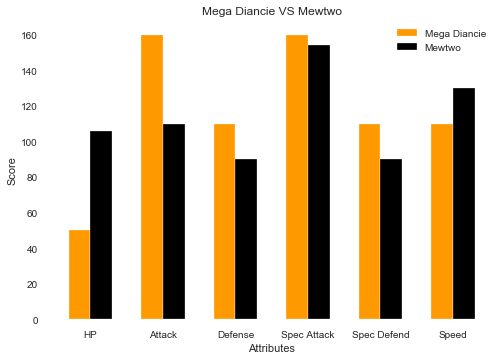

In [119]:
label = ['HP','Attack','Defense','Spec Attack','Spec Defend','Speed']
x = np.arange(6)
width = 0.3

plt.title(f'{pokemon1} VS {pokemon2}')
plt.xlabel('Attributes')
plt.ylabel('Score')
plt.bar(x - width/2, data1[0], width, label=pokemon1, color='#ff9900')
plt.bar(x + width/2, data2[0], width, label=pokemon2, color='#000000')
plt.xticks(ticks=x, labels=label)

plt.legend()

## Deployment Model

In [71]:
import joblib

In [72]:
joblib.dump(gbcdef, 'model_gbc')

['model_gbc']

## Take a look to poke_app.py and HTML. The produce of our work just like in these picture below, but still in developing for catch pokemon with more than one word.

# HOME <br>
<img src="images/home.png"><br> 

# RESULT <br>
<img src="images/result-.png"><br> 

# NOT FOUND <br>
<img src="images/notfound.png"><br> 

# ERROR <br>
<img src="images/error.png"><br> 